In [35]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [36]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [37]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

data_type = "kmer"
trans = "clr_scale"
numPc = [1,2,3,4,5,6,7,8,9,10,20,30,40]
folder_names = ['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first10filter_TRUE','minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
file_names = ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

metric_word = 'auc_all'#''auc_all' # 'pearson' # 

classifier_name = 'bin_antibiotic_last_year'# 'bmi_prediction' #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
classifier = "Random Forest"#'Regression'#"Random Forest"
select_columns_bool = True
title = 'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
special_name = "Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

In [38]:
file_names

['minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale']

In [39]:
folder_names

['AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7',
 'AGP_max_k7']

In [40]:
df_metric = pd.DataFrame()

In [41]:
file_names

['minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale']

In [42]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        filename_temp = data_folder + folder_names[f] +"/cont_pred/"+ data_type + "_BatchCorrected_bmi_corrected_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] +"/class_pred/"+ data_type + "_BatchCorrected_"+ classifier_name + "_" + file_names[f] + "_classification_auc.pkl"
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()])   
        if metric_word == "auc_all":
            df_metric[nice_names[f] + "_first_" + str(numPc[f])] = pd.Series(data_temp[file_names[f]][classifier][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            df_metric[nice_names[f] + "_first_" + str(numPc[f])] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

not file
not file
not file
not file
not file
not file
not file
not file
not file
not file
not file
not file


In [43]:
df_metric

,7-merminerva_first1filter_TRUE_trans_clr_scale,7-merminerva_first2filter_TRUE_trans_clr_scale,7-merminerva_first3filter_TRUE_trans_clr_scale,7-merminerva_first4filter_TRUE_trans_clr_scale,7-merminerva_first5filter_TRUE_trans_clr_scale,7-merminerva_first6filter_TRUE_trans_clr_scale,7-merminerva_first7filter_TRUE_trans_clr_scale,7-merminerva_first8filter_TRUE_trans_clr_scale,7-merminerva_first9filter_TRUE_trans_clr_scale,7-mer_first_10,7-merminerva_first20filter_TRUE_trans_clr_scale,7-merminerva_first30filter_TRUE_trans_clr_scale,7-merminerva_first40filter_TRUE_trans_clr_scale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609374,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616547,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604700,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614272,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615891,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621252,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.619702,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603285,0,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627975,0,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614043,0,0,0


In [44]:
df_metric

,7-merminerva_first1filter_TRUE_trans_clr_scale,7-merminerva_first2filter_TRUE_trans_clr_scale,7-merminerva_first3filter_TRUE_trans_clr_scale,7-merminerva_first4filter_TRUE_trans_clr_scale,7-merminerva_first5filter_TRUE_trans_clr_scale,7-merminerva_first6filter_TRUE_trans_clr_scale,7-merminerva_first7filter_TRUE_trans_clr_scale,7-merminerva_first8filter_TRUE_trans_clr_scale,7-merminerva_first9filter_TRUE_trans_clr_scale,7-mer_first_10,7-merminerva_first20filter_TRUE_trans_clr_scale,7-merminerva_first30filter_TRUE_trans_clr_scale,7-merminerva_first40filter_TRUE_trans_clr_scale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609374,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616547,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604700,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614272,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615891,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621252,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.619702,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603285,0,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627975,0,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614043,0,0,0


In [45]:
df_metric.columns
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

Index(['7-merminerva_first1filter_TRUE_trans_clr_scale',
       '7-merminerva_first2filter_TRUE_trans_clr_scale',
       '7-merminerva_first3filter_TRUE_trans_clr_scale',
       '7-merminerva_first4filter_TRUE_trans_clr_scale',
       '7-merminerva_first5filter_TRUE_trans_clr_scale',
       '7-merminerva_first6filter_TRUE_trans_clr_scale',
       '7-merminerva_first7filter_TRUE_trans_clr_scale',
       '7-merminerva_first8filter_TRUE_trans_clr_scale',
       '7-merminerva_first9filter_TRUE_trans_clr_scale', '7-mer_first_10',
       '7-merminerva_first20filter_TRUE_trans_clr_scale',
       '7-merminerva_first30filter_TRUE_trans_clr_scale',
       '7-merminerva_first40filter_TRUE_trans_clr_scale'],
      dtype='object')

In [46]:
select_columns_bool = False

In [47]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
select_labels = ["raw","MINERVA","Refactor","SmartSVA"]

#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

In [48]:
select_labels

['raw', 'MINERVA', 'Refactor', 'SmartSVA']

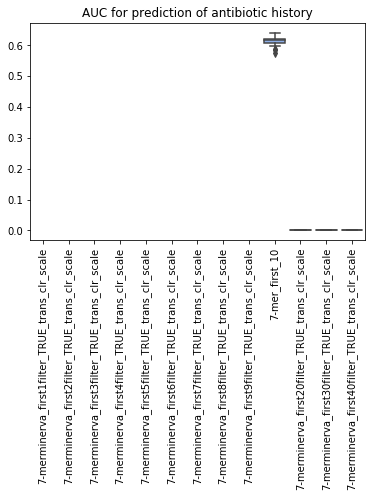

In [49]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.1, 0.1))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans + '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans +  '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [50]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'